In [1]:
import numpy as np
import pandas as pd
import pickle
import os, sys
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.append('/home/wonseok/2022_mimic_vital_instance_dp_synthesis')
from timeDP2.algorithm import original_timedp as odp
from timeDP2.algorithm import timedp_algorithm as tdp

# Data EDA
- original data distribution 
    - missingness check

In [2]:
PROJECT_DIR = Path().cwd().parent
DATA_DIR = PROJECT_DIR.joinpath('data/processed')

live = np.load(DATA_DIR.joinpath('live_numpy.npz'))['result']
death = np.load(DATA_DIR.joinpath('death_numpy.npz'))['result']

live.shape

(6, 4796, 24)

In [3]:
# live[0]
death[0]

array([[ 68.,  65.,  63., ...,  75.,  -1.,  74.],
       [ -1.,  -1.,  -1., ...,  98.,  93.,  75.],
       [122., 129., 130., ..., 148., 144., 147.],
       ...,
       [ 68.,  67.,  65., ...,  72.,  79.,  35.],
       [ 95.,  99., 107., ..., 109., 105., 104.],
       [ -1.,  78.,  77., ...,  -1.,  76.,  89.]], dtype=float32)

In [4]:
live[0]

array([[ 68.,  65.,  63., ...,  75.,  -1.,  74.],
       [ -1.,  -1.,  -1., ...,  98.,  93.,  75.],
       [122., 129., 130., ..., 148., 144., 147.],
       ...,
       [ 68.,  67.,  65., ...,  72.,  79.,  35.],
       [ 95.,  99., 107., ..., 109., 105., 104.],
       [ -1.,  78.,  77., ...,  -1.,  76.,  89.]], dtype=float32)

In [5]:
death = np.load('/home/wonseok/2022_mimic_vital_instance_dp_synthesis/data/processed/2022_mimic_vital_instance/data/processed/death_numpy.npz')['result']
live = np.load('/home/wonseok/2022_mimic_vital_instance_dp_synthesis/data/processed/2022_mimic_vital_instance/data/processed/live_numpy.npz')['result']


In [24]:
val = odp.timeseries_dp(live[0][2], 0.1)

[[0.62936294]]


In [25]:
xs = [x for x in range(0,24)]

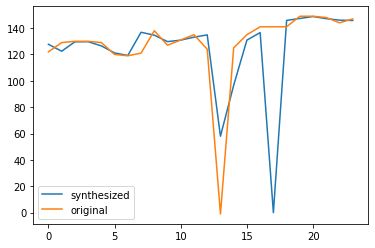

In [26]:
plt.plot(xs, val, label='synthesized')
plt.plot(xs, live[0][2], label ='original')
plt.legend()
plt.show()

In [27]:
DP_object = tdp.TimeDP(epsilon=0.1, delta =0.1, mechanism_type= 'bounded_laplace')
new_sample = tdp.Vector_creator(live[0][2], DP_object)

created boundary list and making new gradients..
creating boundary list


In [10]:
live[0][0]

array([68., 65., 63., 63., 66., 66., 65., 66., 66., 67., 66., 63., 64.,
       70., 71., 74., 74., 72., 74., 77., 87., 75., -1., 74.],
      dtype=float32)

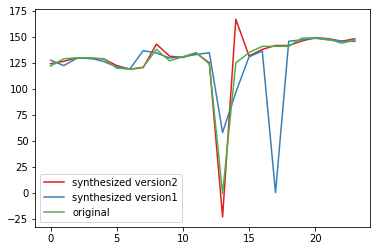

In [28]:
plt.plot(xs, new_sample.new_vector, label='synthesized version2', color ='#e41a1c')
plt.plot(xs, val, label='synthesized version1', color = '#377eb8')
plt.plot(xs, live[0][2], color='#4daf4a', label='original')
plt.legend()
plt.show()

In [12]:
[1,2,3,4,5,6,7]

[1, 2, 3, 4, 5, 6, 7]

In [13]:
new_sample.gradient_list

[-1.5,
 -1.5,
 -1.0,
 0.0,
 1.5,
 0.0,
 -0.5,
 0.5,
 0.0,
 0.5,
 -0.5,
 -1.5,
 0.5,
 3.0,
 0.5,
 1.5,
 0.0,
 -1.0,
 1.0,
 1.5,
 5.0,
 -6.0,
 -38.0,
 37.5]